Dataset Overview: 
Training: 240, Test: 60


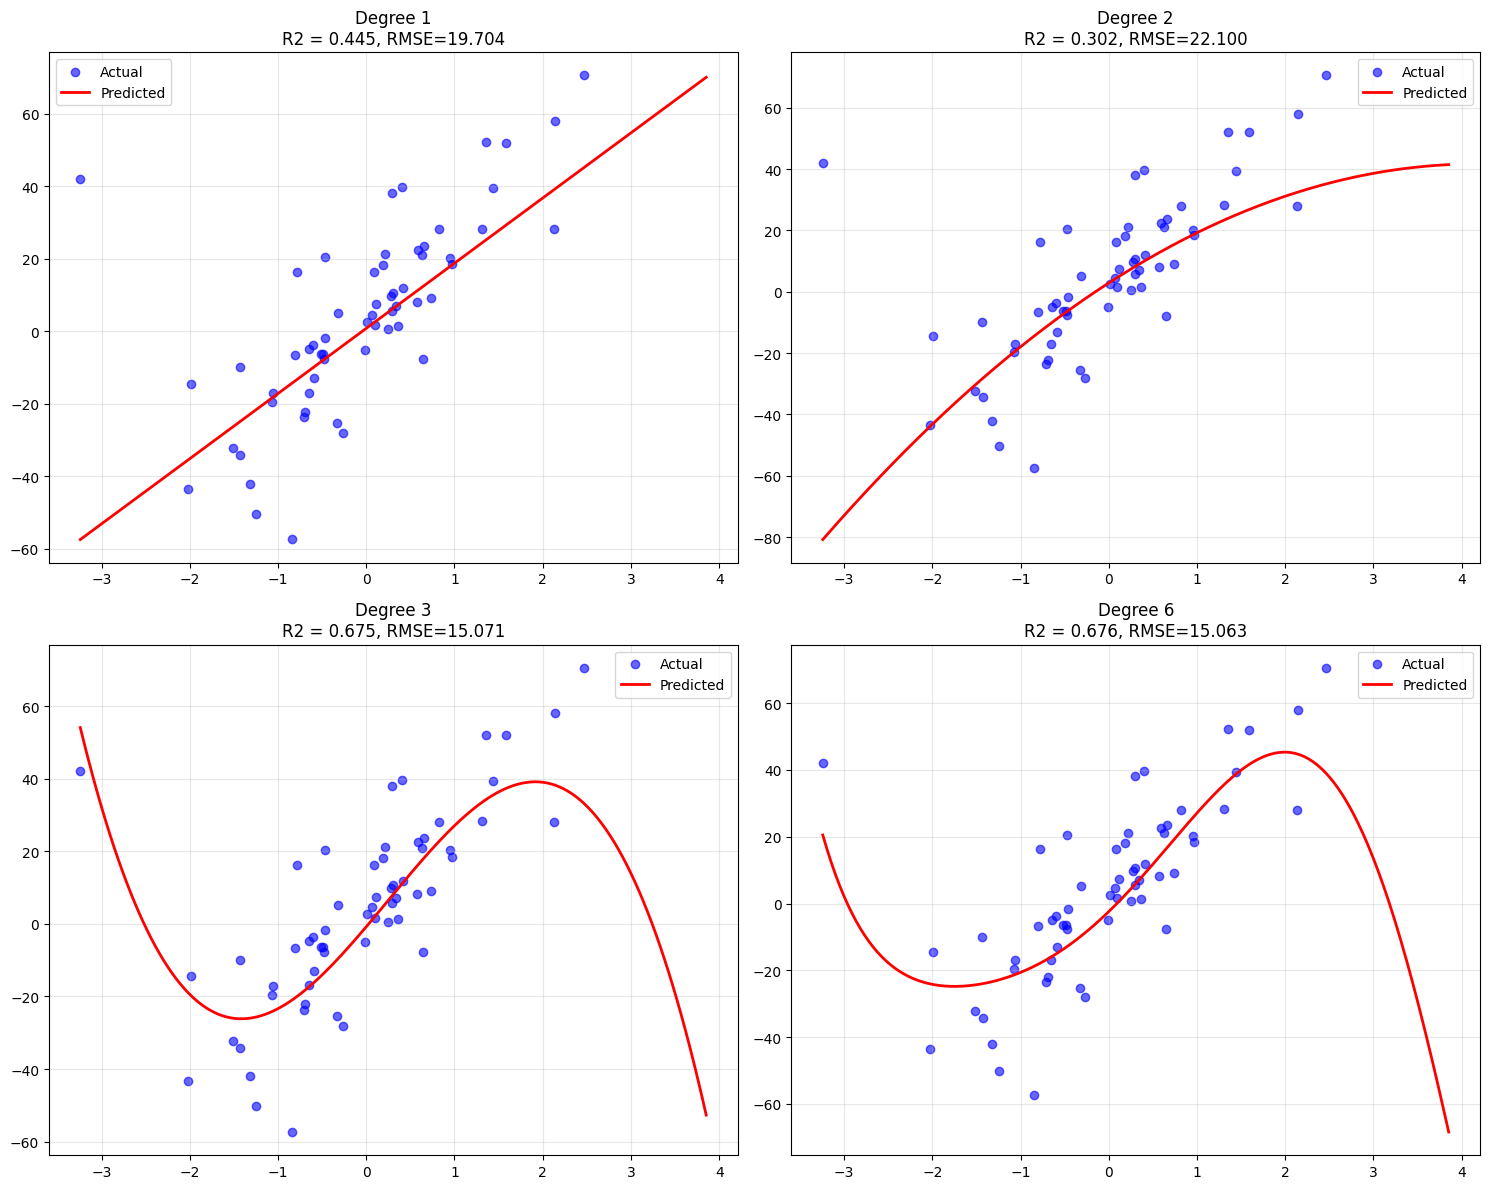

Polynomial reg comparison: 
Degree 1: R2 = 0.4448, RMSE: 19.7044
Degree 2: R2 = 0.3015, RMSE: 22.1002
Degree 3: R2 = 0.6752, RMSE: 15.0708
Degree 6: R2 = 0.6755, RMSE: 15.0634

Best polynomial degree: 6 (R2= 0.6755)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression

# 1. Generate Data
np.random.seed(42)
x, y = make_regression(n_samples=300, n_features=1, noise=10, random_state=42)
y = y + 2*x.flatten()**2 - 3*x.flatten()**3 + np.random.normal(0, 15, len(y)) # Add non-linearity

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Dataset Overview: \nTraining: {x_train.shape[0]}, Test: {x_test.shape[0]}")

# 2. Train & Plot Different Degrees
degrees = [1, 2, 3, 6]
results = {}
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for degree, ax in zip(degrees, axes.flatten()):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    r2, rmse = r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))
    results[degree] = {'r2': r2, 'rmse': rmse}
    
    # Plotting
    x_curve = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
    ax.scatter(x_test, y_test, color='blue', alpha=0.6, label="Actual")
    ax.plot(x_curve, model.predict(x_curve), color="red", lw=2, label="Predicted")
    ax.set_title(f"Degree {degree}\nR2 = {r2:.3f}, RMSE={rmse:.3f}")
    ax.legend(); ax.grid(alpha=0.3)

plt.tight_layout(); plt.show()

# 3. Comparison
print("Polynomial reg comparison: ")
for d in degrees:
    print(f"Degree {d}: R2 = {results[d]['r2']:.4f}, RMSE: {results[d]['rmse']:.4f}")

best_degree = max(results, key=lambda k: results[k]['r2'])
print(f"\nBest polynomial degree: {best_degree} (R2= {results[best_degree]['r2']:.4f})")